# Baseball Case Study

#### <u>Problem Statement</u>: 
<div style="text-align: justify"> 
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
</div>

   * Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

   * Output: Number of predicted wins (W)

In [7]:
# 1. Import the libraries
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statistical libraries
import phik
from scipy.stats import pearsonr
from scipy.stats import zscore

# feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [23]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


This is a <font color = red>linear regression problem</font> where we need to predict the number of wins (W)

In [24]:
# Checking for the shape and the datatypes of the elements of the dataset
print(df.shape)
df.info()

(30, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are 17 columns inclusive of the target column,none of the columns have missing values

In [25]:
# Confirming missing values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# 2. EDA

In [26]:
# plotting the histograms of each column to visualize its distribution
# splitting the data in a independent and target variable

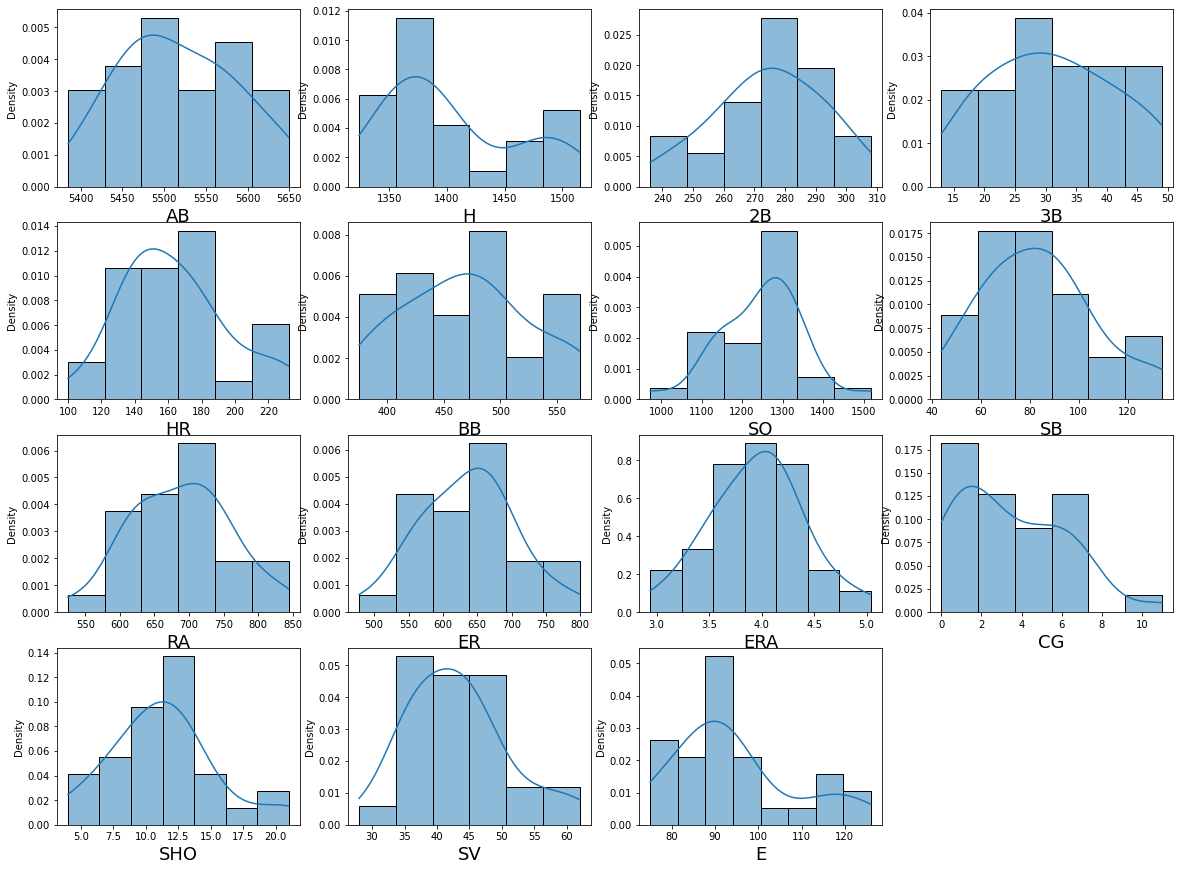

In [27]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in df.columns[2:]:
    if plotnumber<17:
        plt.subplot(4,4,plotnumber)
        sns.histplot(df[col], kde = True, stat = 'density')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

The data is generally normally distributed except for the column 'H','CG' and 'E' hence we can use the log transformation to make it more normally distributed

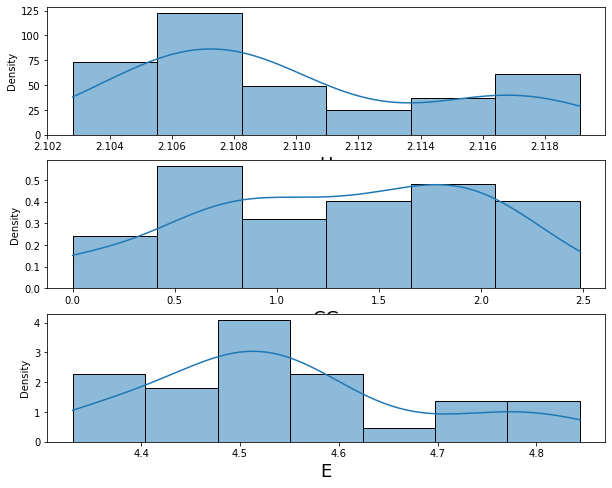

In [31]:
log_transform_features = ['H', 'CG', 'E']
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in log_transform_features:
    plt.subplot(3,1,plotnumber)
    x = np.log1p(df[col])
    df[col] = x
    sns.histplot(df[col], kde = True, stat = 'density')
    plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

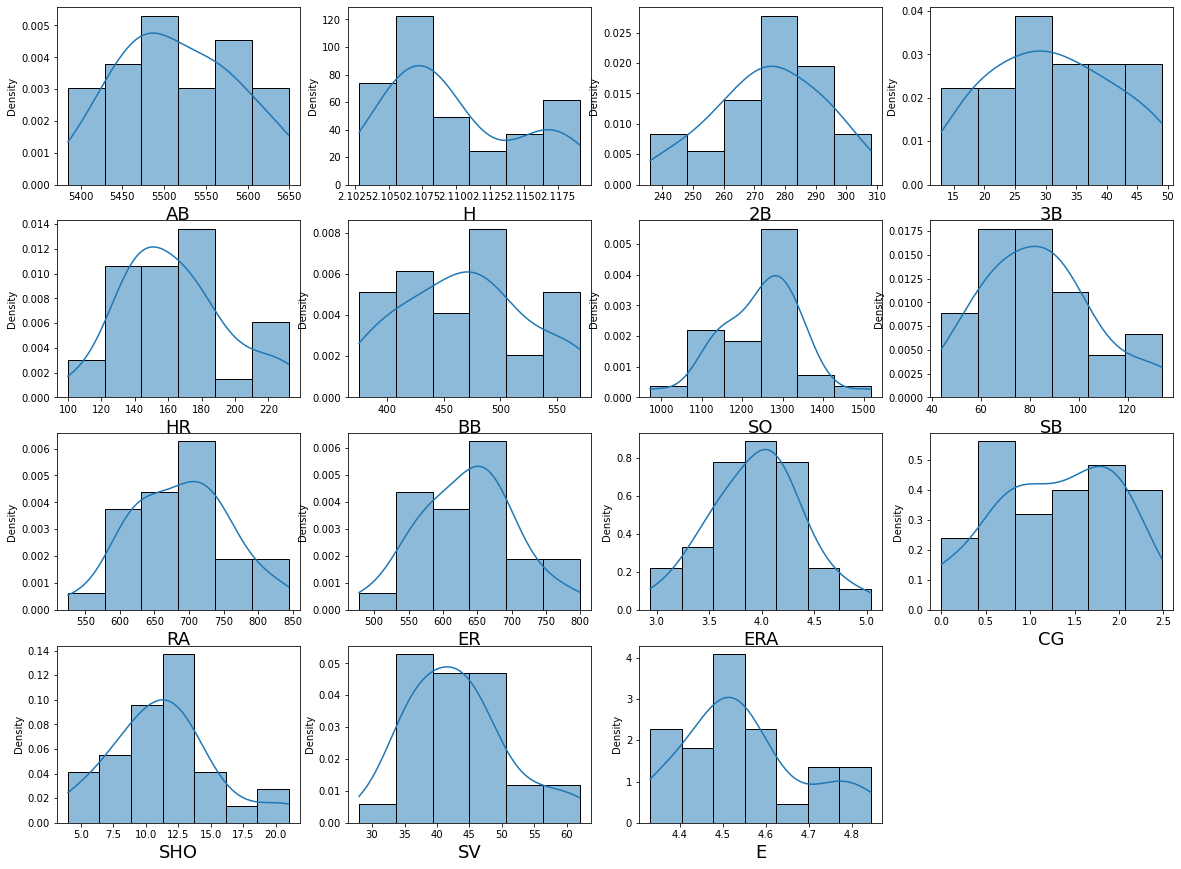

In [35]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in df.columns[2:]:
    if plotnumber<17:
        plt.subplot(4,4,plotnumber)
        sns.histplot(df[col], kde = True, stat = 'density')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

In [36]:
y = df['W']
x = df.drop('W', axis = 1)

In [37]:
# Checking for the linear correlation bertween the variables and the target variable
temp = pd.DataFrame()
score= []
pvalue=[]
feature = []

for col in x.columns:
    score.append(pearsonr(x[col],y)[0])
    pvalue.append(pearsonr(x[col],y)[1])
    feature.append(col)

temp['feature']= feature
temp['score'] = score
temp['pvalue']= pvalue


In [43]:
temp[temp['pvalue']<0.05].sort_values('score')

,feature,score,pvalue
11,ERA,-0.819600,3.027199e-08
9,RA,-0.812952,4.808611e-08
10,ER,-0.809435,6.097957e-08
3,2B,0.427797,1.836329e-02
0,R,0.430751,1.748813e-02
13,SHO,0.471805,8.484266e-03
6,BB,0.484342,6.683839e-03
14,SV,0.666530,5.784065e-05


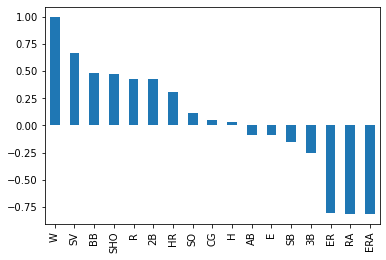

In [48]:
df.corr()['W'].sort_values(ascending = False).plot.bar()
plt.show()